In [2]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt
import itertools

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
n_band = 5

# Test 1

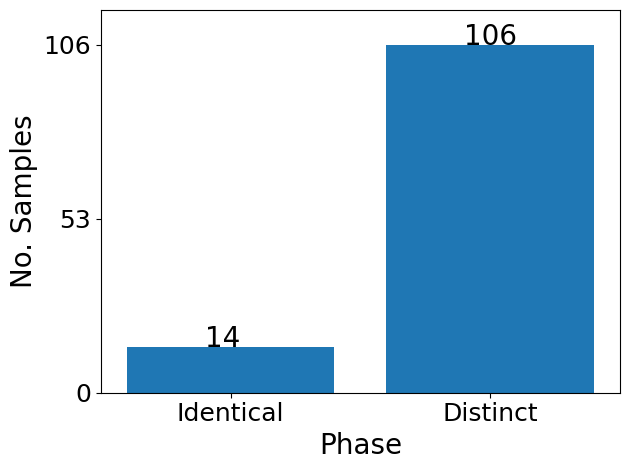

In [5]:
directory_name = 'Test 1'


with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'r') as fileop:
    group_number = fileop.readlines()
    
group_number = eval(group_number[0])

fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)

for i, v in enumerate(group_number):
    plt.text(i+0.9, v, str(v), fontsize=20)
     
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
plt.savefig('figs_Artin_{0}.svg'.format(directory_name))

In [8]:
index = 1
with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
    data = fileop.readlines()
    
models = list()
for i,_op_str in enumerate(data):
    op = eval(_op_str)
    _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
    _model = obtain_model_braid(n_band, _braid_operators)
    
    flag = False
    for modelc in models:
        if _model == modelc:
            flag = True
            break
            
    if not flag:
        models.append(_model)
        
for i, _model in enumerate(models):
    show_braid_words(_model.get_braid_words())
    #_model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))
    
print("The number of models: ", len(models))

$\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_2$ $\sigma_1$ $\sigma_3$ $\sigma_1$ 

$\sigma_2$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_3$ $\sigma_1$ 

$\sigma_1$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_2$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_1$ $\sigma_3$ $\sigma_2$ $\sigma_1$ 

$\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_1$ 

$\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_3$ $\sigma_1$ $\sigma_2$ $\sigma_1$ 

$\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_2$ $\sigma_1$ 

$\sigma_1$ $\sigma_2$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma_2$ $\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma_1$ $\sigma_3$ $\sigma_2$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma_3$ $\sigma_1$ $\sigma_2$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma_2$ $\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma_3$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ $\sigma_1$ 

$\sigma_2$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_1$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_3$ $\sigma_2$ $\sigma_1$ $\sigma_1$ 

$\sigma_3$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_1$ $\sigma_1$ 

$\sigma_2$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ 

$\sigma_3$ $\sigma_2$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ 

$\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_3$ 

$\sigma^{-1}_4$ $\sigma_2$ $\sigma_1$ $\sigma_1$ $\sigma_3$ 

$\sigma_2$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ $\sigma_3$ 

$\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_2$ $\sigma_3$ 

$\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ $\sigma_2$ $\sigma_3$ 

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ 

$\sigma_2$ $\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_3$ 

$\sigma_1$ $\sigma_1$ $\sigma_2$ $\sigma^{-1}_4$ $\sigma_3$ 

$\sigma_1$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_1$ $\sigma_2$ 

$\sigma^{-1}_4$ $\sigma_1$ $\sigma_3$ $\sigma_1$ $\sigma_2$ 

$\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_2$ 

$\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_2$ 

$\sigma^{-1}_4$ $\sigma_3$ $\sigma_1$ $\sigma_1$ $\sigma_2$ 

$\sigma_3$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ $\sigma_2$ 

$\sigma_1$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma_3$ $\sigma_2$ 

$\sigma^{-1}_4$ $\sigma_1$ $\sigma_1$ $\sigma_3$ $\sigma_2$ 

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_2$ 

$\sigma_1$ $\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ 

$\sigma_3$ $\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ 

$\sigma_1$ $\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ $\sigma_2$ 

$\sigma_1$ $\sigma_2$ $\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_2$ $\sigma_1$ $\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_1$ $\sigma_3$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_3$ $\sigma_1$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_2$ $\sigma_3$ $\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_3$ $\sigma_2$ $\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ 

$\sigma_1$ $\sigma_2$ $\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ 

$\sigma_2$ $\sigma_1$ $\sigma_1$ $\sigma_3$ $\sigma^{-1}_4$ 

$\sigma_1$ $\sigma_1$ $\sigma_2$ $\sigma_3$ $\sigma^{-1}_4$ 

$\sigma_1$ $\sigma_3$ $\sigma_1$ $\sigma_2$ $\sigma^{-1}_4$ 

$\sigma_3$ $\sigma_1$ $\sigma_1$ $\sigma_2$ $\sigma^{-1}_4$ 

$\sigma_1$ $\sigma_1$ $\sigma_3$ $\sigma_2$ $\sigma^{-1}_4$ 

The number of models:  53


In [9]:
index = 1
with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
    data = fileop.readlines()
    
models = list()
for i,_op_str in enumerate(data):
    op = eval(_op_str)
    _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
    _model = obtain_model_braid(n_band, _braid_operators)
    
    flag = False
    for modelc in models:
        if _model == modelc:
            flag = True
            break
            
    if not flag:
        models.append(_model)
        
for i, _model in enumerate(models):
    #show_braid_words(_model.get_braid_words())
    _model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))
    
print("The number of models: ", len(models))

The number of models:  53


# Test 2

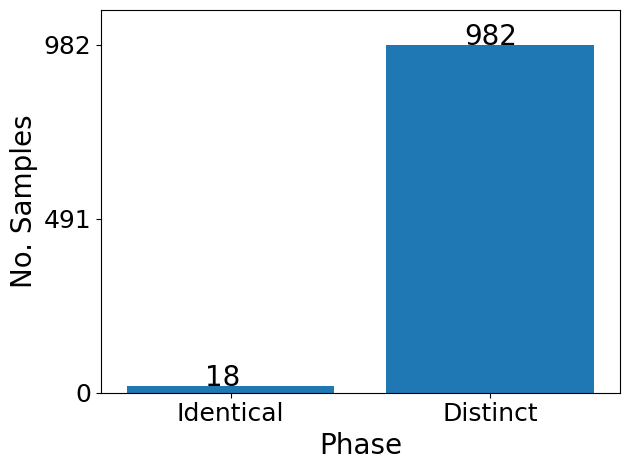

In [9]:
directory_name = 'Test 2'


with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'r') as fileop:
    group_number = fileop.readlines()
    
group_number = eval(group_number[0])

fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)

for i, v in enumerate(group_number):
    plt.text(i+0.9, v, str(v), fontsize=20)
     
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
plt.savefig('figs_Artin_{0}.svg'.format(directory_name))

In [12]:
index = 1
with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
    data = fileop.readlines()
    
models = list()
for i,_op_str in enumerate(data):
    op = eval(_op_str)
    _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
    _model = obtain_model_braid(n_band, _braid_operators)
    
    flag = False
    for modelc in models:
        if _model == modelc:
            flag = True
            break
            
    if not flag:
        models.append(_model)
        
for i, _model in enumerate(models[:10]):
    show_braid_words(_model.get_braid_words())
    #_model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))
    
print("The number of models: ", len(models))

$\sigma^{-1}_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_3$ $\sigma_3$ $\sigma^{-1}_2$ $\sigma^{-1}_4$ $\sigma_4$ $\sigma_3$ $\sigma^{-1}_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_2$ $\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_2$ $\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_2$ $\sigma^{-1}_1$ $\sigma_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_2$ $\sigma_3$ $\sigma_4$ $\sigma_4$ $\sigma_4$ $\sigma^{-1}_4$ $\sigma^{-1}_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_3$ $\sigma_3$ $\sigma_2$ $\sigma_1$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_3$ $\sigma_2$ $\sigma_1$ $\sigma_1$ $\sigma_4$ $\sigma_3$ $\sigma_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_3$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

The number of models:  782


In [11]:
for index in [0, 1]:
    with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
        data = fileop.readlines()

    models = list()
    for i,_op_str in enumerate(data):
        op = eval(_op_str)
        _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
        _model = obtain_model_braid(n_band, _braid_operators)

        flag = False
        for modelc in models:
            if _model == modelc:
                flag = True
                break

        if not flag:
            models.append(_model)

    for i, _model in enumerate(models):
        #show_braid_words(_model.get_braid_words())
        _model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))

    print("{0} The number of models: {1}".format(index,len(models)))

0 The number of models: 12
1 The number of models: 782


# Test 3

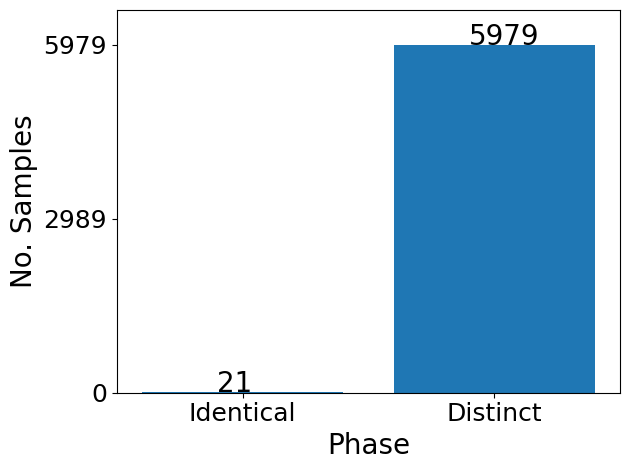

In [13]:
directory_name = 'Test 3'


with open('./figs/Artin/{directory_name}/group_number.txt'.format(directory_name=directory_name),'r') as fileop:
    group_number = fileop.readlines()
    
group_number = eval(group_number[0])

fig = plt.figure()
xticks = ['Identical', 'Distinct']
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)

for i, v in enumerate(group_number):
    plt.text(i+0.9, v, str(v), fontsize=20)
     
plt.xticks([1,2], xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,2+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"Phase",fontsize=20)
#plt.ylabel(r"No. Samples",fontsize=20,rotation=90,horizontalalignment='right')
plt.ylabel(r"No. Samples",fontsize=20,rotation=90)
plt.tight_layout()
plt.savefig('figs_Artin_{0}.svg'.format(directory_name))

In [15]:
index = 1
with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
    data = fileop.readlines()
    
models = list()
for i,_op_str in enumerate(data):
    op = eval(_op_str)
    _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
    _model = obtain_model_braid(n_band, _braid_operators)
    
    flag = False
    for modelc in models:
        if _model == modelc:
            flag = True
            break
            
    if not flag:
        models.append(_model)
        
for i, _model in enumerate(models[:10]):
    show_braid_words(_model.get_braid_words())
    #_model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))
    
print("The number of models: ", len(models))

$\sigma_4$ $\sigma^{-1}_4$ $\sigma_4$ $\sigma^{-1}_2$ $\sigma_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma^{-1}_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_1$ $\sigma^{-1}_4$ $\sigma^{-1}_2$ $\sigma^{-1}_4$ $\sigma_3$ $\sigma_4$ $\sigma^{-1}_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_4$ $\sigma^{-1}_2$ $\sigma_1$ $\sigma^{-1}_3$ $\sigma_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_3$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_3$ $\sigma^{-1}_3$ $\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_3$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_2$ $\sigma^{-1}_4$ $\sigma^{-1}_3$ $\sigma_1$ $\sigma^{-1}_3$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma_1$ $\sigma_1$ $\sigma^{-1}_3$ $\sigma_3$ $\sigma^{-1}_1$ $\sigma_4$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_3$ $\sigma^{-1}_3$ $\sigma_2$ $\sigma_4$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

$\sigma^{-1}_4$ $\sigma_2$ $\sigma_2$ $\sigma_1$ $\sigma^{-1}_4$ $\sigma_2$ $\sigma_3$ $\sigma_1$ 

The number of models:  5519


In [13]:
for index in [0, 1]:
    with open('./figs/Artin/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=index),'r') as fileop:
        data = fileop.readlines()

    models = list()
    for i,_op_str in enumerate(data):
        op = eval(_op_str)
        _braid_operators = [BraidOperator(x[0],x[1]) for x in op]
        _model = obtain_model_braid(n_band, _braid_operators)

        flag = False
        for modelc in models:
            if _model == modelc:
                flag = True
                break

        if not flag:
            models.append(_model)

    for i, _model in enumerate(models):
        #show_braid_words(_model.get_braid_words())
        _model.save_band('./figs/Artin/Export/{directory_name}/{index}_{i}.txt'.format(directory_name=directory_name, index=index, i=i))

    print("{0} The number of models: {1}".format(index,len(models)))

0 The number of models: 20
1 The number of models: 5519
